## To explore supervised machine learning

#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Reading data from link

In [2]:
url = "http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data imported sucessfully")

Data imported sucessfully


### Viewing data

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Plotting data to find any relationship

Text(0, 0.5, 'Percentage Score')

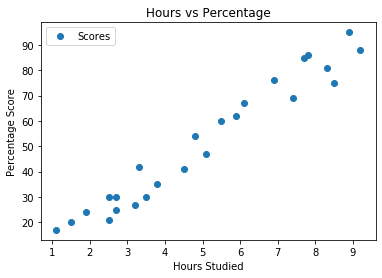

In [4]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing data

In [5]:
# Taking the independent variable as hours
x=data['Hours']

# Taking the dependent variable as Scores
y_a=data['Scores']

### Viewing data

In [6]:
x.head()

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [7]:
y_a.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

### Functions for linear regression

#### I will not use scikit learn module and do this simple linear regression using pure mathematical functions

In [8]:
# Function for line
def line(m,x,c):
    return m*x+c

# Function for error
def error(m,x,c,y_a):
    y_p=line(m,x,c)
    return np.mean((y_p-y_a)**2)

# Derivative of error function w.r.t m
def derivative_m(m,x,c,y_a):
    y_p=line(m,x,c)
    return 2*np.mean((y_p-y_a)*x)

# Derivative of error function w.r.t c
def derivative_c(m,x,c,y_a):
    y_p=line(m,x,c)
    return 2*np.mean(y_p-y_a)

### Linear regression model

Initial error 1362.5228
The iterations ended due to number of iterations 500
Final error 28.882730509245466
Final m 9.77580339176153
final c 2.4836733994243003


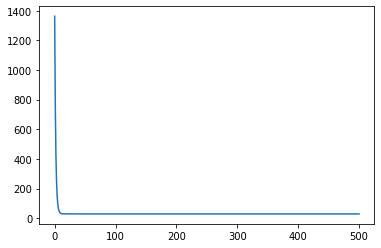

In [68]:
# Assuming value of slope and intercept
m_r=3
c_r=4

# Creating a list to store error
er_list=[]

# Number of iterations
i=0

# Relaxation factor
alpha_m=0.03
alpha_c=0.09

# Initial error
er1=error(m_r,x,c_r,y_a)
print("Initial error",er1)

# To Calculate optimized slope and intercept
while(True):
    er=error(m_r,x,c_r,y_a)
    er_list.append(er)
    m_r=m_r-alpha_m*derivative_m(m_r,x,c_r,y_a)
    c_r=c_r-alpha_c*derivative_c(m_r,x,c_r,y_a)
    if(er<5):
        print("The iterations ended due to error less than 5 ")
        break
    elif(i>=500):
        print("The iterations ended due to number of iterations 500")
        break
    i=i+1
print("Final error",er)
plt.plot(er_list)
print("Final m",m_r)
print("final c",c_r)

#### We sponataneously changed relaxation factor to get less error and to get the best slope and intercept

### Plotting the line and comparing with actual data

Text(0, 0.5, 'Percentage Score')

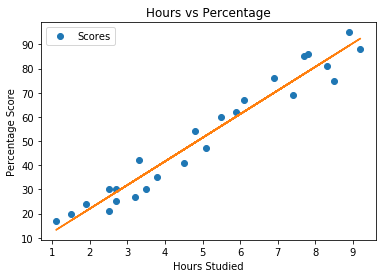

In [72]:
m_actual=9.77580339176153
c_actual=2.4836733994243003
marks=m_actual*x+c_actual
data.plot(x='Hours',y='Scores',style='o')
plt.plot(x,marks)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

### Comparing actual data with predicted data

In [73]:
compare=pd.DataFrame({'Actual':y_a,'Predicted':marks})
compare.head(10)

,Actual,Predicted
0,21,26.923182
1,47,52.340271
2,27,33.766244
3,75,85.578002
4,30,36.698985
5,20,17.147378
6,88,92.421065
7,60,56.250592
8,81,83.622842
9,25,28.878343


### Inputting user input data and calculating marks

In [74]:
h=float(input("Enter hours of study"))
mark=m_actual*h+c_actual
print("Marks obtained",mark)

Enter hours of study9.25
Marks obtained 92.90985477321846


### Evaluating the model

#### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error that we have already calculated in the process

In [66]:
print("Final mean square error",er)

Final mean square error 28.882730509245466
